In [ ]:
%matplotlib inline
import pandas as pd
import os
import sys
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics.regression import mean_squared_error
from sklearn.metrics.regression import mean_absolute_error
sys.path.append('/home/ycedres/Projects/RNN/RNN-windPower/src')
from pre_process.split_ml_ts import dataframe_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [51]:
h1 = "/home/ycedres/Projects/RNN/RNN-windPower/database/Offshore_WA_OR_features_h_01.csv"
df_h1 = pd.read_csv(h1, delimiter=';', index_col=0)

In [6]:
data = dataframe_split(df_h1)
train_set = data['train_set']
validation_set = data['validation_set']
test_set = data['test_set']

In [7]:
features_columns = train_set.columns[1:-1]
target_column = train_set.columns[-1:]

In [8]:
features_train_set = train_set[features_columns]
target_train_set = train_set[target_column]

features_validation_set = validation_set[features_columns]
target_validation_set = validation_set[target_column]

features_test_set = test_set[features_columns]
target_test_set = test_set[target_column]

In [9]:
x_train = features_train_set.values; y_train = target_train_set.values
x_val = features_validation_set.values; y_val = target_validation_set.values

# Grid search

In [96]:
def svr_param_selection(X, y):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [97]:
params = svr_param_selection(features_train_set,target_train_set)

/home/ycedres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ycedres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ycedres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ycedres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was pass

/home/ycedres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ycedres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ycedres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ycedres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was pass

/home/ycedres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ycedres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ycedres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
print(params['C']);print(params['gamma'])

10
0.01


In [103]:
clf = SVR(C=params['C'],gamma=params['gamma'],kernel='rbf')
clf.fit(features_train_set, target_train_set)

/home/ycedres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [104]:
predicted = clf.predict(features_test_set)

In [105]:
print(predicted)

[ 3.7283871   4.26858347  4.74088044 ...,  2.32106638  1.45028508
  0.89072922]


In [106]:
df_prediction = test_set.copy()
df_prediction['target_predicted'] = predicted
df_prediction.head()

,f_0,f_1,f_2,f_3,f_4,f_5,target_h1,target_predicted
target_date,,,,,,,,
2006-05-26 20:00:00,5.30,5.19,5.24,5.27,4.45,3.92,4.19,3.728387
2006-05-26 21:00:00,5.19,5.24,5.27,4.45,3.92,4.19,4.60,4.268583
2006-05-26 22:00:00,5.24,5.27,4.45,3.92,4.19,4.60,5.34,4.740880
2006-05-26 23:00:00,5.27,4.45,3.92,4.19,4.60,5.34,4.70,5.689613
2006-05-27 00:00:00,4.45,3.92,4.19,4.60,5.34,4.70,3.00,4.436129


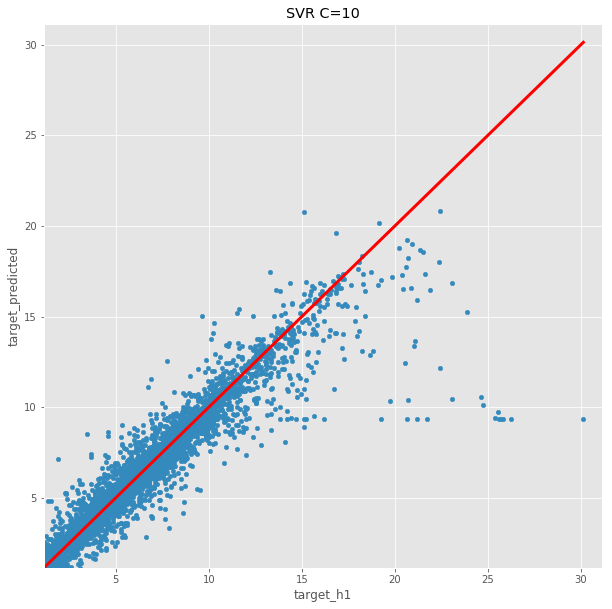

In [57]:
title='SVR C=10'

f, ax = plt.subplots(1,1,figsize=(10,10))
x_min = df_prediction.target_h1.min() 
x_max = df_prediction.target_h1.max()
y_min = df_prediction.target_predicted.min()
y_max = df_prediction.target_predicted.max()
ax.set_title(title)
# line
ax.set_xlim(x_min+1, x_max+1)
ax.set_ylim(x_min+1, x_max+1)
ax.plot((x_min, x_max), (x_min, x_max), lw=3, c='r')
# scatter
df_prediction.plot(ax=ax,
                   x='target_h1',
                   y='target_predicted',
                   kind='scatter',
                  )

# Buscar el valor de overfitting (variando C)

In [10]:
history = {} # dictionary with all metrics
mse = [] ; val_mse = [] # mean squared error
c_range = [0.001, 0.01, 0.1, 1, 10]
for c in c_range:
    print('*** Penalty parameter C of the error term: {0}'.format(c))
    # - model parameters
    knr = SVR(C=c,kernel='rbf')
    # - fit the data 
    knr = knr.fit(x_train, y_train)
    # - save del model
    #path_model_saved = os.path.join(directory_by_horizont, 
    #                                'K-nearest_regressor_{0:03d}_{1}'.format(n_neighbors,
    #                                                                             weights))
    #joblib.dump(knr, path_model_saved)
    # - overfitting: evaluate train and validation set on the fitted model. 
    y_train_eval = knr.predict(x_train)
    y_val_eval = knr.predict(x_val)
    # - metric calculation
    mse_train = mean_squared_error(y_train, y_train_eval)
    mse_validation = mean_absolute_error(y_val, y_val_eval)
    if mse_train < mse_valid:
        print(mse_valid)
        return
    # for each k-neighbors confoguration save the metrics inside a list 
    mse.append(mse_train); val_mse.append(mse_validation)

history['mse'] = mse
history['val_mse'] = val_mse

*** Penalty parameter C of the error term: 40


/home/ycedres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*** Penalty parameter C of the error term: 40
*** Penalty parameter C of the error term: 40
*** Penalty parameter C of the error term: 40
*** Penalty parameter C of the error term: 40


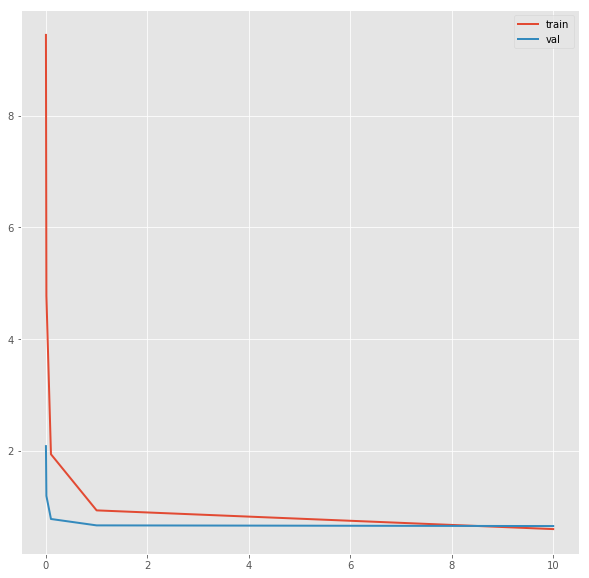

In [25]:
f = plt.figure(figsize=(10, 10))
plt.plot(c_range, history['mse'], lw=2, label='train')
plt.plot(c_range, history['val_mse'], lw=2, label='val')
plt.legend()

# Considerando que a partir de C=9 hay overfitting

El valor por defecto de gamma es 1/número de features

In [35]:
clf = SVR(C=9,gamma='auto',kernel='rbf')
clf.fit(features_train_set, target_train_set)

/home/ycedres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=9, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [40]:
predicted = clf.predict(features_test_set)
df_prediction = test_set.copy()
df_prediction['target_predicted'] = predicted

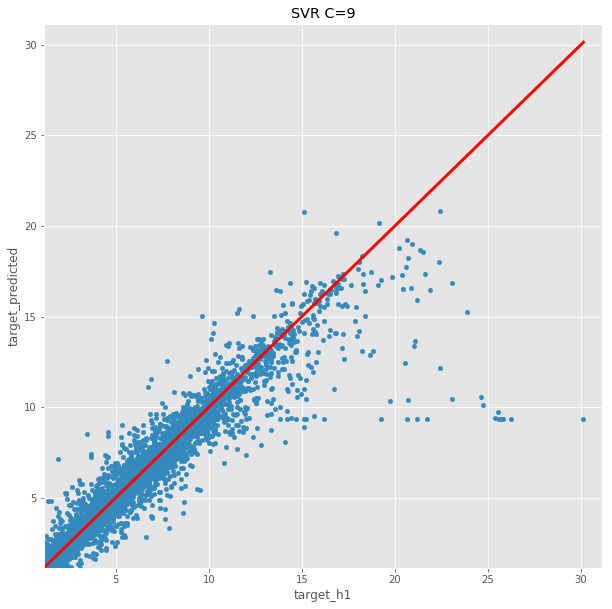

In [56]:
title='SVR C=9'

f, ax = plt.subplots(1,1,figsize=(10,10))
x_min = df_prediction.target_h1.min() 
x_max = df_prediction.target_h1.max()
y_min = df_prediction.target_predicted.min()
y_max = df_prediction.target_predicted.max()
ax.set_title(title)
# line
ax.set_xlim(x_min+1, x_max+1)
ax.set_ylim(x_min+1, x_max+1)
ax.plot((x_min, x_max), (x_min, x_max), lw=3, c='r')
# scatter
df_prediction.plot(ax=ax,
                   x='target_h1',
                   y='target_predicted',
                   kind='scatter',
                  )

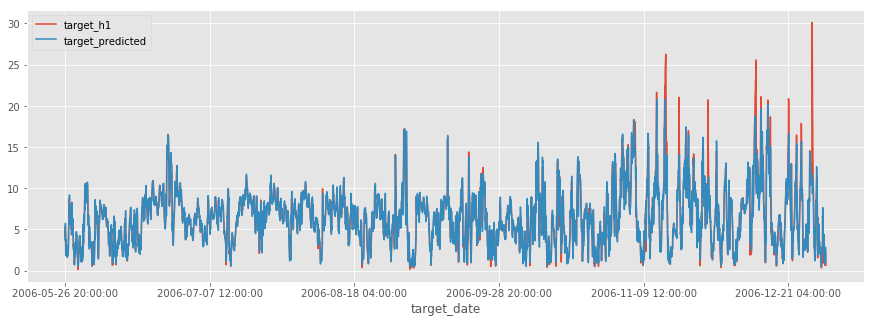

In [54]:
df_prediction.iloc[:,-2:].plot(figsize=(15,5))